<a href="https://colab.research.google.com/github/Habib-20/kel1-project-apm/blob/main/K_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# import library
import pandas as pd
import numpy as np
# read data lulus.csv to pandas dataframe
predikat = pd.read_csv("lulus.csv")


In [4]:
predikat.head()

,IPK,Pelatihan Pengembangan Diri,Prestasi,Forum Komunikasi Kuliah,Kegiatan Organisasi,Lulus Cepat
0,3.26,6,1,2,4,0
1,3.12,6,0,1,1,0
2,3.29,6,4,3,3,0
3,3.10,2,0,6,2,1
4,3.12,3,0,4,2,0


In [5]:
#menentukan variabel independen (feature)
x = predikat.drop(["Lulus Cepat"], axis=1)

#menentukan variabel dependen (target/class)
y = predikat["Lulus Cepat"]

In [6]:
# import package model selection dari Sklearn train_test_split untuk membagi data
from sklearn.model_selection import train_test_split

# membagi data training dan data testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [7]:
#mengaktifkan package sklearn.preprocessing untuk membantu melakukan standarisasi data
from sklearn.preprocessing import StandardScaler

#membuat objek standarisasi
standard_scaler = StandardScaler()
standard_scaler.fit(x_train)

x_train = standard_scaler.transform(x_train)
x_test = standard_scaler.transform(x_test)

In [8]:
# K-Nearest Neighbor(KNN) untuk classifier data
from sklearn.neighbors import KNeighborsClassifier

#mengaktifkan fungsi kalsifikasi untuk KNN
knn = KNeighborsClassifier(n_neighbors=4)
#memasukkan data train pada objek fungsi klasifikasi KNN
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [9]:
# Menentukan prediksi KKN dari data test (data aktual)
y_predict = knn.predict(x_test)
y_predict

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0])

In [10]:
# melihat akurasi data hasil prediksi dengan data aktual
# classification_report digunakan untuk membuat report ttg metriks kalsifikasi
# confusion_matrix merupakan matriks untuk menghitung akurasi dari nilai prediksi dan aktual
from sklearn.metrics import classification_report, confusion_matrix

#menampilkan matriks hasil prediksi
print(confusion_matrix(y_test, y_predict))

[[1 4]
 [2 3]]


In [11]:
#ketepatan hasil prediksi
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.43      0.60      0.50         5

    accuracy                           0.40        10
   macro avg       0.38      0.40      0.38        10
weighted avg       0.38      0.40      0.38        10



Text(0, 0.5, 'Error rata-rata')

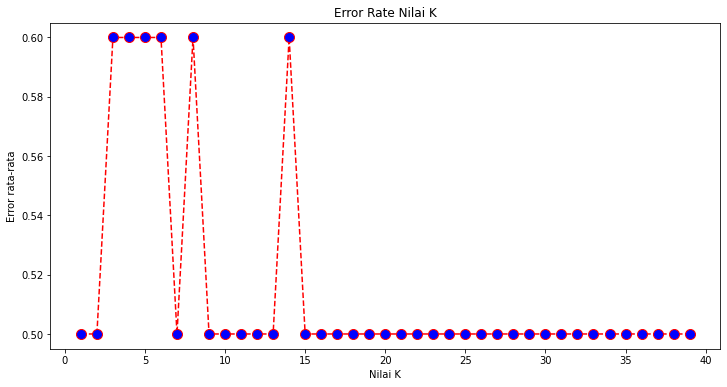

In [12]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn_clf = KNeighborsClassifier(n_neighbors=i)
    knn_clf.fit(x_train, y_train)
    pred_i = knn_clf.predict(x_test)
    error.append(np.mean(pred_i != y_test))

import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Nilai K')  
plt.xlabel('Nilai K')  
plt.ylabel('Error rata-rata') 

In [14]:
#Uji classifier

ipk = float(input("Masukkan nilai IPK: "))
plthan = int(input("Masukkan jumlah ikut pelatihan/pengembangan diri: "))
prestasi = int(input("Masukkan jumlah prestasi: "))
forum = int(input("Masukkan jumlah keterlibatan dalam forum: "))
organisasi = int(input("Masukkan jumlah ikutserta organisasi: "))

n = np.array([[ipk,plthan,prestasi,forum,organisasi]])
pred_n = knn.predict(n)

if pred_n == 0:
    print("Lulus tidak cepat")
elif pred_n == 1:
    print("Lulus cepat")

Masukkan nilai IPK: 3.9
Masukkan jumlah ikut pelatihan/pengembangan diri: 2
Masukkan jumlah prestasi: 1
Masukkan jumlah keterlibatan dalam forum: 4
Masukkan jumlah ikutserta organisasi: 1
Lulus cepat
